In [1]:
import pickle
import igraph as ig
import matplotlib
import random
import itertools
import numpy as np

### 1. Load the graph
First we start by loading the graph:

In [2]:
filename = "../networks/game_of_thrones/GoT.graphml"
g = ig.Graph.Read(filename)

### 2. Plot the loaded graph (without any community detection yet)
First, we define the layout for our plots.

In [3]:
random.seed(202)
layout = g.layout("fr")
style = {'layout': layout, 'vertex_size': 10, 'edge_width': 0.3}

Now, we can plot the initial graph

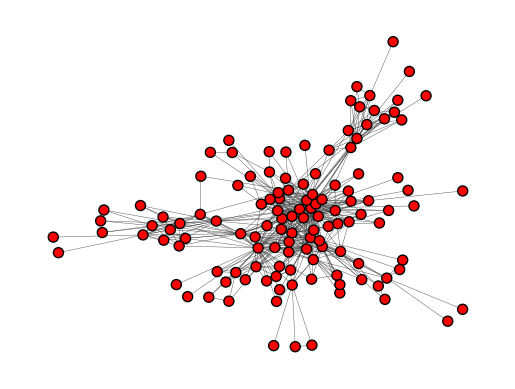

In [4]:
ig.plot(g, **style)

### 3. Run community detection
Let's run the community detection on the network, first, with the Leiden algorithm:

In [5]:
communities = g.community_leiden(objective_function="modularity", weights="weight")

### 4. Visualize detected communities

Now we can visualize the obtained clsuters with a simple igraph visualization technique:

Found 7 communities (modularity: 0.5291)


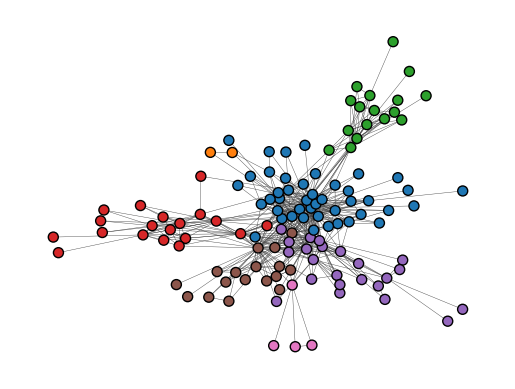

In [6]:
colors_map = matplotlib.colormaps["tab10"]
style['vertex_color'] = [colors_map(cluster) for cluster in communities.membership]
ig.plot(g, **style)
print(f"Found {len(communities)} communities (modularity: {communities.modularity:.4f})")

### 5. Exploring other community detection algorithms (optional)

Now, we can try out some other community detection methods as well, such as the Louvain and Label Propagation algorithms:

Found 7 communities (modularity: 0.5289)


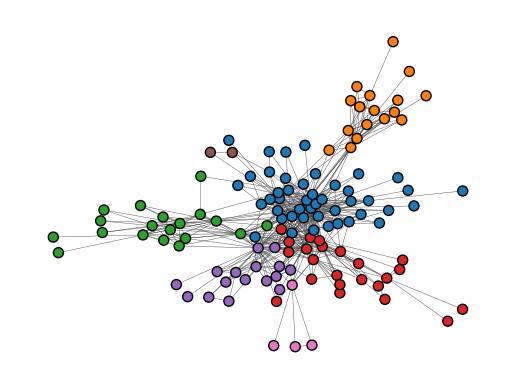

In [7]:
communities = g.community_multilevel(weights="weight")
style['vertex_color'] = [colors_map(cluster) for cluster in communities.membership]
ig.plot(g, **style)
print(f"Found {len(communities)} communities (modularity: {communities.modularity:.4f})")

Found 6 communities (modularity: 0.4386)


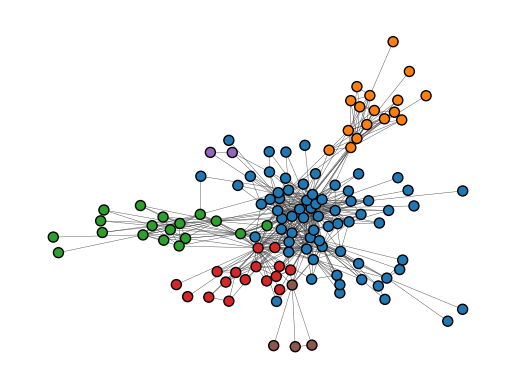

In [8]:
communities = g.community_label_propagation(weights="weight")
style['vertex_color'] = [colors_map(cluster) for cluster in communities.membership]
ig.plot(g, **style)
print(f"Found {len(communities)} communities (modularity: {communities.modularity:.4f})")

### 6. Test the stability of the result
Next, we can test the stability of the Leiden algorithm's result by:

* Generating multiple partitions:

In [9]:
partitions = []
for _ in range(500):
    partitions.append(g.community_leiden(objective_function="modularity", weights="weight"))

* Calculating pairwise NMI _(Normalized Mutual Information)_ values (a value of 1 means that the two partitions are identical, a high value - close to 1 - means that they are similar, a low value means that they are dissimilar):

In [10]:
pairwise_nmi_values = []
for p1, p2 in itertools.combinations(partitions, 2):
    nmi = ig.compare_communities(p1, p2, method='nmi')
    pairwise_nmi_values.append(nmi)

* Plotting the results on a histogram:

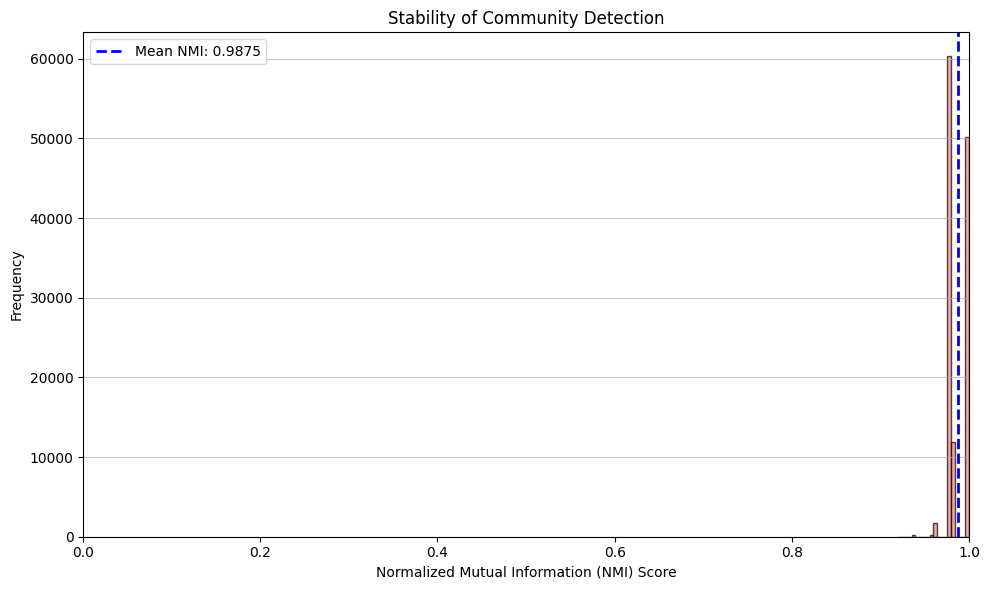

In [11]:
plt = matplotlib.pyplot
plt.figure(figsize=(10, 6))
plt.hist(pairwise_nmi_values, bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
plt.xlabel('Normalized Mutual Information (NMI) Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
    
# Set x-axis limits from 0 to 1
plt.xlim(0, 1)

# Add a line for the mean NMI
mean_nmi = np.mean(pairwise_nmi_values)
plt.axvline(mean_nmi, color='blue', linestyle='dashed', linewidth=2, label=f'Mean NMI: {mean_nmi:.4f}')

plt.title('Stability of Community Detection')
plt.legend()
plt.tight_layout()
plt.show()

<div style="background-color: #e6ffe6; padding: 20px; border-radius: 5px;">

* **Note on Community Significance:** Now that we've successfully identified and visualized communities within our network, a critical next step is to assess their significance. It's important to ask: are these detected structures truly meaningful, or could they have arisen by random chance? Furthermore, for algorithms with stochastic elements (like Leiden), how consistent are the results across different runs? A detailed exploration of how to test the significance of communities can be found in the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Ftest_significance_of_community.ipynb).

* **Note on Algorithms:** Various algorithms are available in *igraph* for community detection. They are categorized by their underlying principles and suited for various scenarios. In the community detection methods listed above, weights are interpreted as stronger connections, but this is not always the case with other methods. For a more thorough description of these methods and recommendations on when to use each, you can refer to the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fcommunity_detection_algorithms.ipynb).

* **Note on Visualizations:** The possibilities for visualizing **communities** are endless. For examples of various community visualization techniques, please refer to the notebook [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fgenerating_and_visualizing_clusters.ipynb).

* **Note on Algorithm Stability:** When running community detection algorithms like Leiden, you might notice that each execution yields a different result. This variability is due to the inherent stochastic nature of the Leiden algorithm. If you're wondering how to arrive at a more stable and consistent result, consensus clustering provides the solution. A detailed description and example of how consensus clustering works can be found [here](https://mybinder.org/v2/gh/BeaMarton13/community-detection-guide-w-igraph/HEAD?urlpath=%2Fdoc%2Ftree%2Fnotebooks%2Fconsensus_clustering.ipynb).

</div>